## Use case 3: Signal production and ground distribution

In [1]:
import ToyModel as tm

#### Setting telescope characteristics

Default telescope type: MST
Default angular aperture in degrees: 8.0
Default detection area in m2: 113.097
Generic telescope type: generic
Angular aperture of generic telescope in degrees: 10.0
Detection area of generic telescope in m2: 100.0
User-defined telescope type: user_defined
Angular aperture in degrees: 10.0
Detection area in m2: 120.0


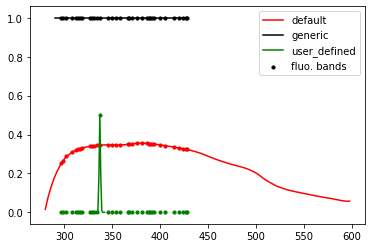

In [2]:
## By default, a telescope of type 'MST' is generated
## with the detection efficiency, angular aperture and detection area taken from CTA data
telescope = tm.Telescope(tel_type='MST')
print("Default telescope type:", telescope.tel_type)
print("Default angular aperture in degrees:", telescope.apert)
print("Default detection area in m2:", telescope.area)
import matplotlib.pyplot as plt
plt.plot(telescope.wvl_cher, telescope.eff_cher, 'r', label='default'); #Outside 280 - 600 nm, the efficiency is set to zero
plt.scatter(telescope.wvl_fluo, telescope.eff_fluo, color='r', s=10);

## If tel_type!='MST', a generic telescope with 100% efficiency in the 290 - 430 nm range,
## aperture of 10 degrees and 100 m2 area is generated
telescope2 = tm.Telescope(tel_type='generic') #tel_type may be set to None, for instance
print("Generic telescope type:", telescope2.tel_type)
print("Angular aperture of generic telescope in degrees:", telescope2.apert)
print("Detection area of generic telescope in m2:", telescope2.area)
plt.plot(telescope2.wvl_cher, telescope2.eff_cher, 'k', label='generic');
plt.scatter(telescope2.wvl_fluo, telescope2.eff_fluo, color='k', s=10, label='fluo. bands');
plt.legend();

## The above characteristics (and more) can be modified by the user
## To modify the telescope efficiency, it must be input a DataFrame having two columns:
## Wavelength in nm (with constant discretization step) and efficiency in decimal fraction
import pandas as pd
import numpy as np
efficiency = pd.DataFrame(columns=['wvl', 'eff']) 
efficiency.wvl = np.arange(332., 343., 1.) #Last value is 342 nm
efficiency.eff = 0.5* np.exp(- ((efficiency.wvl - 337.) /1.)**2) #Pass band filter
telescope3 = tm.Telescope(tel_type='user_defined', efficiency=efficiency, apert=10., area=120.)
print("User-defined telescope type:", telescope3.tel_type)
print("Angular aperture in degrees:", telescope3.apert)
print("Detection area in m2:", telescope3.area)
plt.plot(telescope3.wvl_cher, telescope3.eff_cher, 'g', label='user_defined');
plt.scatter(telescope3.wvl_fluo, telescope3.eff_fluo, color='g', s=10);
plt.legend();

In [3]:
## User-defined telescope based on an existing Telescope object, but with some changes
telescope4 = telescope2.copy(x=0.1, y=-0.2, theta=20., az=120., area=50., tel_type='my_tel')

In [4]:
## Help on Telescope constructor
#tm.Telescope?
## Help on Telescope object
#telescope4?

#### Signal production

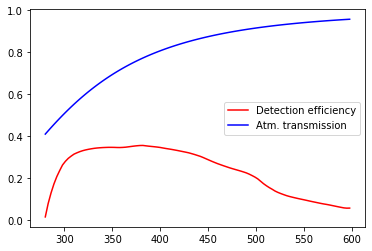

In [5]:
## The number of photons from a shower that are collected by a telescope is obtained by computing
## the fraction of solid angle covered by the telescope area subtended at each shower point and the
## atmospheric transmission, only considering Rayleigh scattering.
## It is assumed a mass attenuation length of 1645 g/cm2 at 350 nm increasing with wavelength to the fourth power
import matplotlib.pyplot as plt
import numpy as np
telescope = tm.Telescope()
wvl = telescope.wvl_cher
plt.plot(wvl, telescope.eff_cher, 'r', label='Detection efficiency');
plt.plot(wvl, np.exp(-600./1645*(350./wvl)**4), 'b', label='Atm. transmission') #Shower-to-telescope distance of 600g/cm2
plt.legend();

In [6]:
## Calculation of signal from Shower and Telescope objects
shower = tm.Shower(theta=20., az=30.)
telescope = tm.Telescope(x=0.3, y=-0.2, theta=22., az=30.)
## By default, both the atmospheric transmission and telescope efficiency are included
signal = tm.Signal(telescope, shower)
## The atmospheric transmission and/or the telescope efficiency can be turned off
#signal = tm.Signal(telescope, shower, atm_trans=False, tel_eff=False)
## If the telescope efficiency is not included, the wavelength range defined in the telescope object is used,
## unless it is modified using via the parameters wvl_ini, wvl_fin and wvl_step,
## where wvl_step is the discretization step to integrate the wavelenght-dependent atmospheric transmission
#signal = tm.Signal(telescope, shower, tel_eff=False, wvl_ini=350., wvl_fin=500., wvl_step=5.)

In [7]:
## Number of photoelectrons stored in a Signal object, subclass of DataFrame
## Only shower points within the telescope field of view contribute to signal
## The very beginning of the shower profile (s<0.01) is ignored to speed up calculations
signal
## This object contains the Shower and Telescope objects, as well as a Projection object constructed from these objects
#signal.shower
#signal.telescope
#signal.projection
#signal.atmosphere #Equivalent to signal.shower.atmosphere or signal.projection.atmosphere
#signal.track

,Npe_fluo,Npe_cher,Npe_total
27,1.434683e+00,170.943719,172.378403
28,1.295066e+00,162.391762,163.686828
29,1.165408e+00,153.355354,154.520762
30,1.045440e+00,143.411226,144.456666
31,9.348576e-01,133.893892,134.828750
...,...,...,...
187,1.053899e-07,0.000022,0.000022
188,1.031746e-07,0.000022,0.000022
189,9.888124e-08,0.000021,0.000021
190,9.478589e-08,0.000020,0.000020


In [8]:
## Some attributes of Signal object
print("Atmospheric transmission included:", signal.atm_trans)
print("Telescope efficiency included:", signal.tel_eff)
print("Wavelenght range:", (signal.wvl_ini, signal.wvl_fin, signal.wvl_step))
print("Sum of photoelectrons due to Cherenkov light:", signal.Npe_cher_sum)
print("Sum of photoelectrons due to fluorescence light:", signal.Npe_fluo_sum)
print("Sum of photoelectrons due to both light components:", signal.Npe_total_sum)

Atmospheric transmission included: True
Telescope efficiency included: True
Wavelenght range: (280.0, 600.0, 3.0)
Sum of photoelectrons due to Cherenkov light: 1954.9150373114026
Sum of photoelectrons due to fluorescence light: 12.450960780869774
Sum of photoelectrons due to both light components: 1967.3659980922723


In [9]:
## Visualization of signal evolution as a function of both time and beta angle,
## which is the angular distance of the shower track from the telescope point of view
#signal.show();

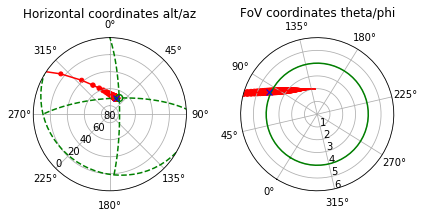

In [10]:
## There are some inherited methods as well
#signal.show_profile();
#signal.show_light_production();
signal.show_projection(max_theta=6.); #Equivalent to shower.show_projection(telescope, max_theta=6.)

In [11]:
### Help on Signal constructor
#tm.Signal?
## Help on Signal object
#signal?

#### Photon distribution at ground level

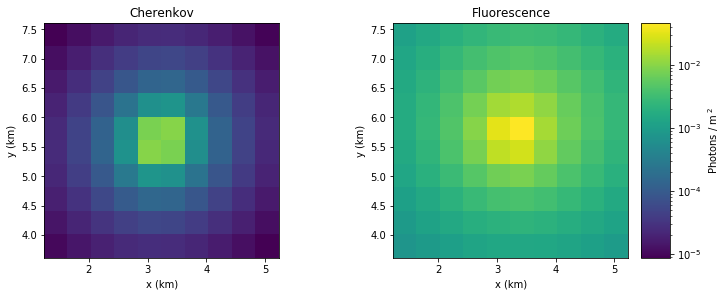

In [12]:
## Calculation of photon distribution at ground level
## By default, the wavelenght range is set to 290-430nm, the atmospheric transmission is included,
## and a square grid of 2x2 km2 with discretization size of 0.2km around the origin of the coordinate system is assumed
#shower.show_distribution();
## The grid position, height, dimensions and discretization size can be modified
x_c, y_c, z_c = shower.track.h_to_xyz(20.) #Coordinates of shower point at 20 km a.s.l.
shower.show_distribution(x_c=x_c, y_c=y_c, z_c=z_c, size_x=4., size_y=4., N_x=10, N_y=10); #Distribution at 20km a.s.l.
## In case of a linear grid (i.e., N_x=1 or N_x=1), 1D plots are generated
#shower.show_distribution(size_x=10., N_x=10, N_y=1);
# Also, the wavelength range can be modified and the atmospheric transmission can be turned off
#shower.show_distribution(wvl_ini=350., wvl_fin=500., atm_trans=False);

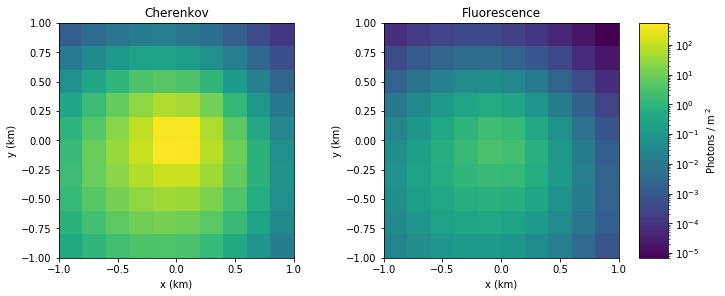

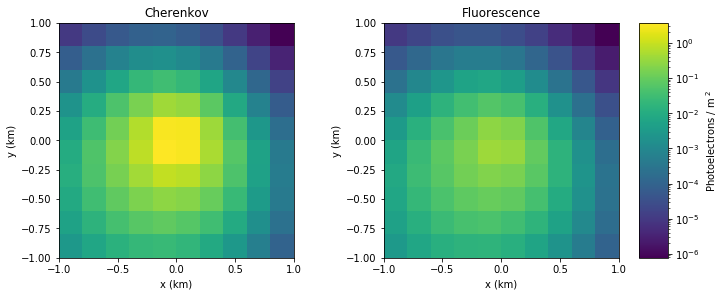

In [13]:
## This function also allows for the calculation of density of photons in a given wavelengh range
## that would be detected by a grid of identical telescopes, with each having a field of view around a common pointing direction
shower = tm.Shower(theta=20., az=30.)
shower.show_distribution(telescope=telescope3, theta=22., az=30., wvl_ini=300., wvl_fin=450.);
## Equivalent to 
#telescope5 = telescope3.copy(theta=22., az=30.)
#shower.show_distribution(telescope=telescope5, wvl_ini=300., wvl_fin=450.);
## Note: If wvl_ini, wvl_fin and wvl_step are not given, those of telescope5 are used (but not the efficiency)

## The telescope efficiency can be turn on to obtain the signal distribution instead of the photon distribution
shower.show_distribution(telescope=telescope3, theta=22., az=30., tel_eff=True);
## Note: If tel_eff=True, then wvl_ini, wvl_fin and wvl_step are always those of telescope5

In [14]:
## Help on show_distribution
#shower.show_distribution?